In [2]:
#IPython extension to reload modules before executing user code. If we make any change in function 
# and imoprting it we don't need to restart if we use auto reload 
%load_ext autoreload

# # to print in between values as well without print
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
# import libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# from pandas_profiling import ProfileReport


# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


# scipy
from scipy.stats import boxcox

In [4]:
# load database
data = pd.read_csv('Data/transformed/processed_miss_outlier.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,70.0,69.0,46.0,45.0,Yes,Good,Above-7,M
1,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,12.0,30.0,0.0,17.0,No,Good,Above-7,L
2,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,49.0,70.0,19.0,75.0,Yes,Good,Under-7,H
3,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,72.0,87.0,72.0,89.0,Yes,Good,Above-7,M
4,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,70.0,92.0,50.0,7.0,Yes,Good,Under-7,H


In [5]:
# To view whole profile data in HTML format uncomment pandas profile library and run
# profile = ProfileReport(data)
# profile

In [6]:
# categoric data
cat_columns = data.select_dtypes(include='O')
cat_columns.head()

# numeric data
num_columns = data.select_dtypes(include='number')
num_columns.head()
cat_columns.shape, num_columns.shape

((384, 13), (384, 4))

## 1. Catrgoric features visualizatoin

### a. Basic Histogram plot

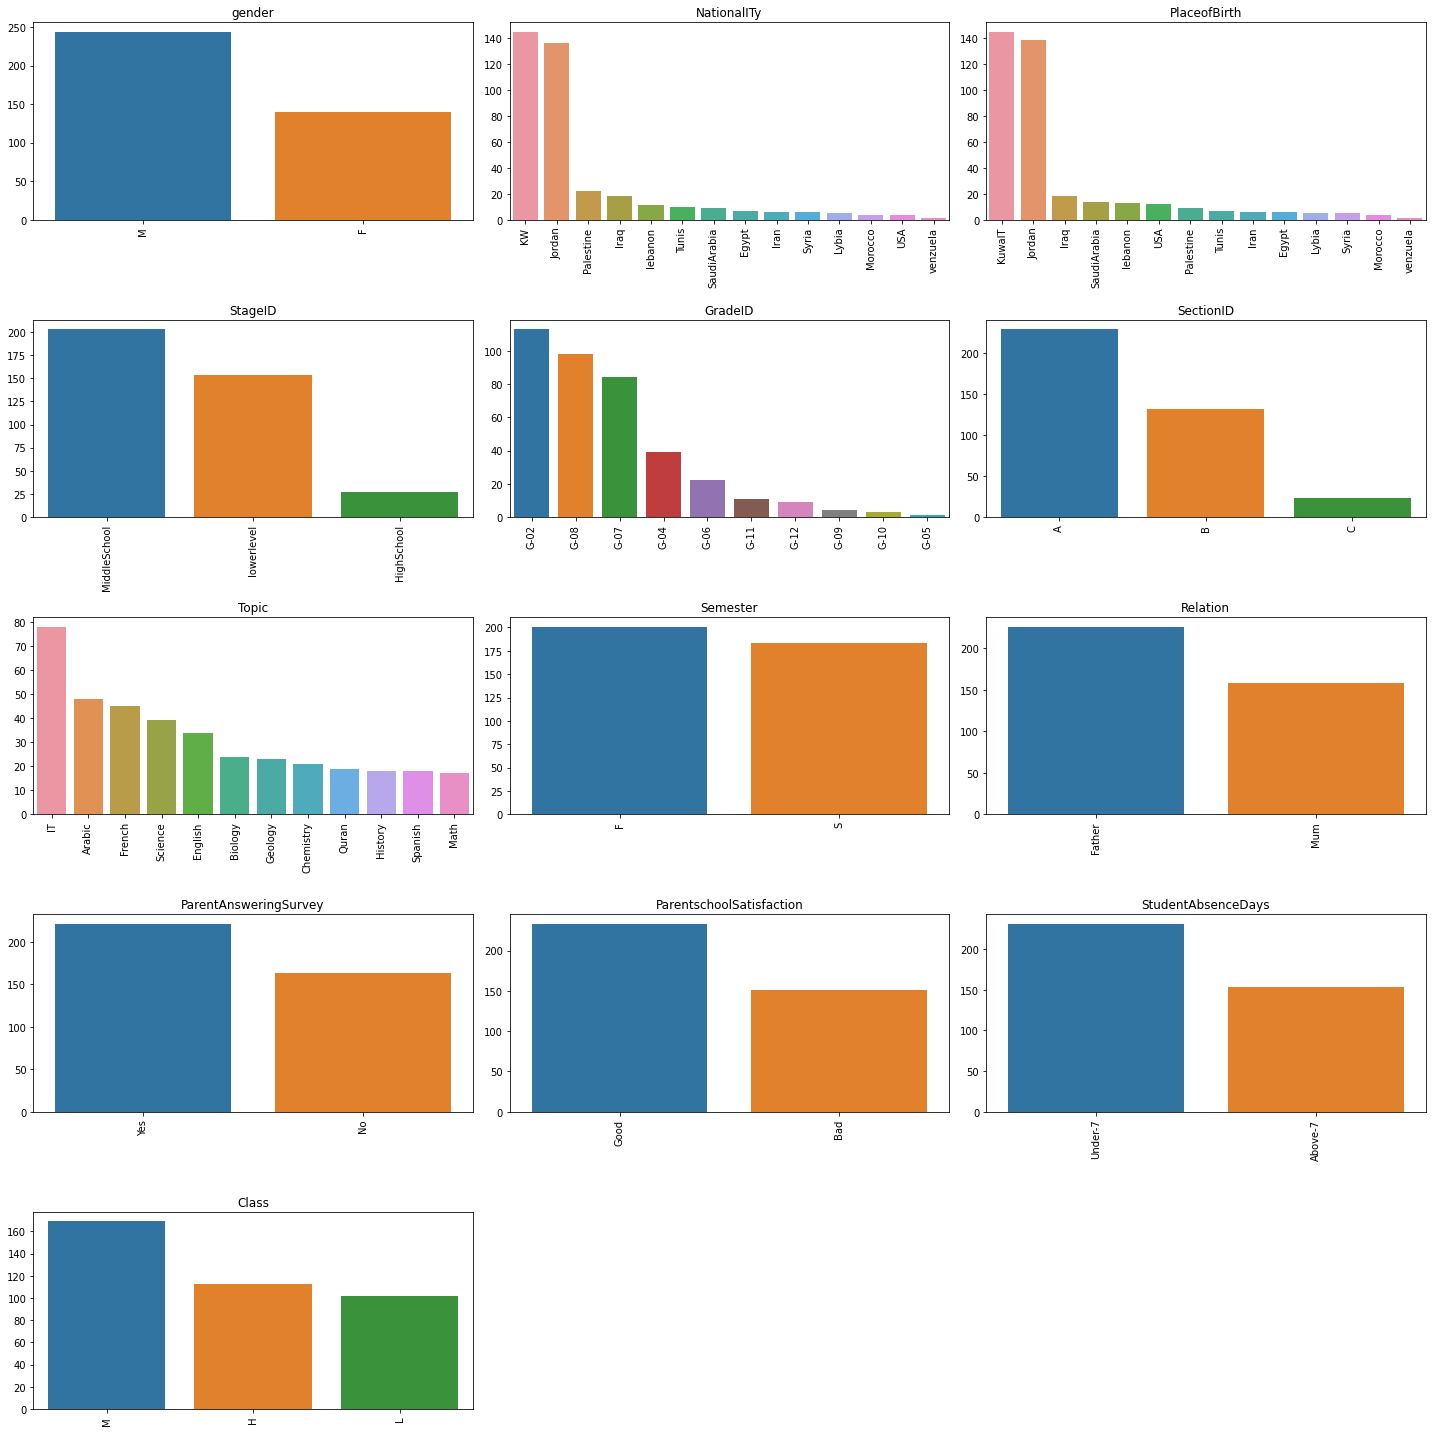

In [7]:
fig = plt.figure(figsize=(20,20))
for i,col in enumerate(cat_columns):
    ax = fig.add_subplot(5, 3, i+1)
    # temp = data[col].value_counts().plot(kind='bar')
    temp = data[col].value_counts()
    sn.barplot(temp.index, temp.values)
    plt.xticks(rotation=90)
    plt.title(col)
fig.tight_layout()

**Findings**
1. Most of the countries are middle east
2. most of the students are in IT

### b. relatoin with respect to our predicting class

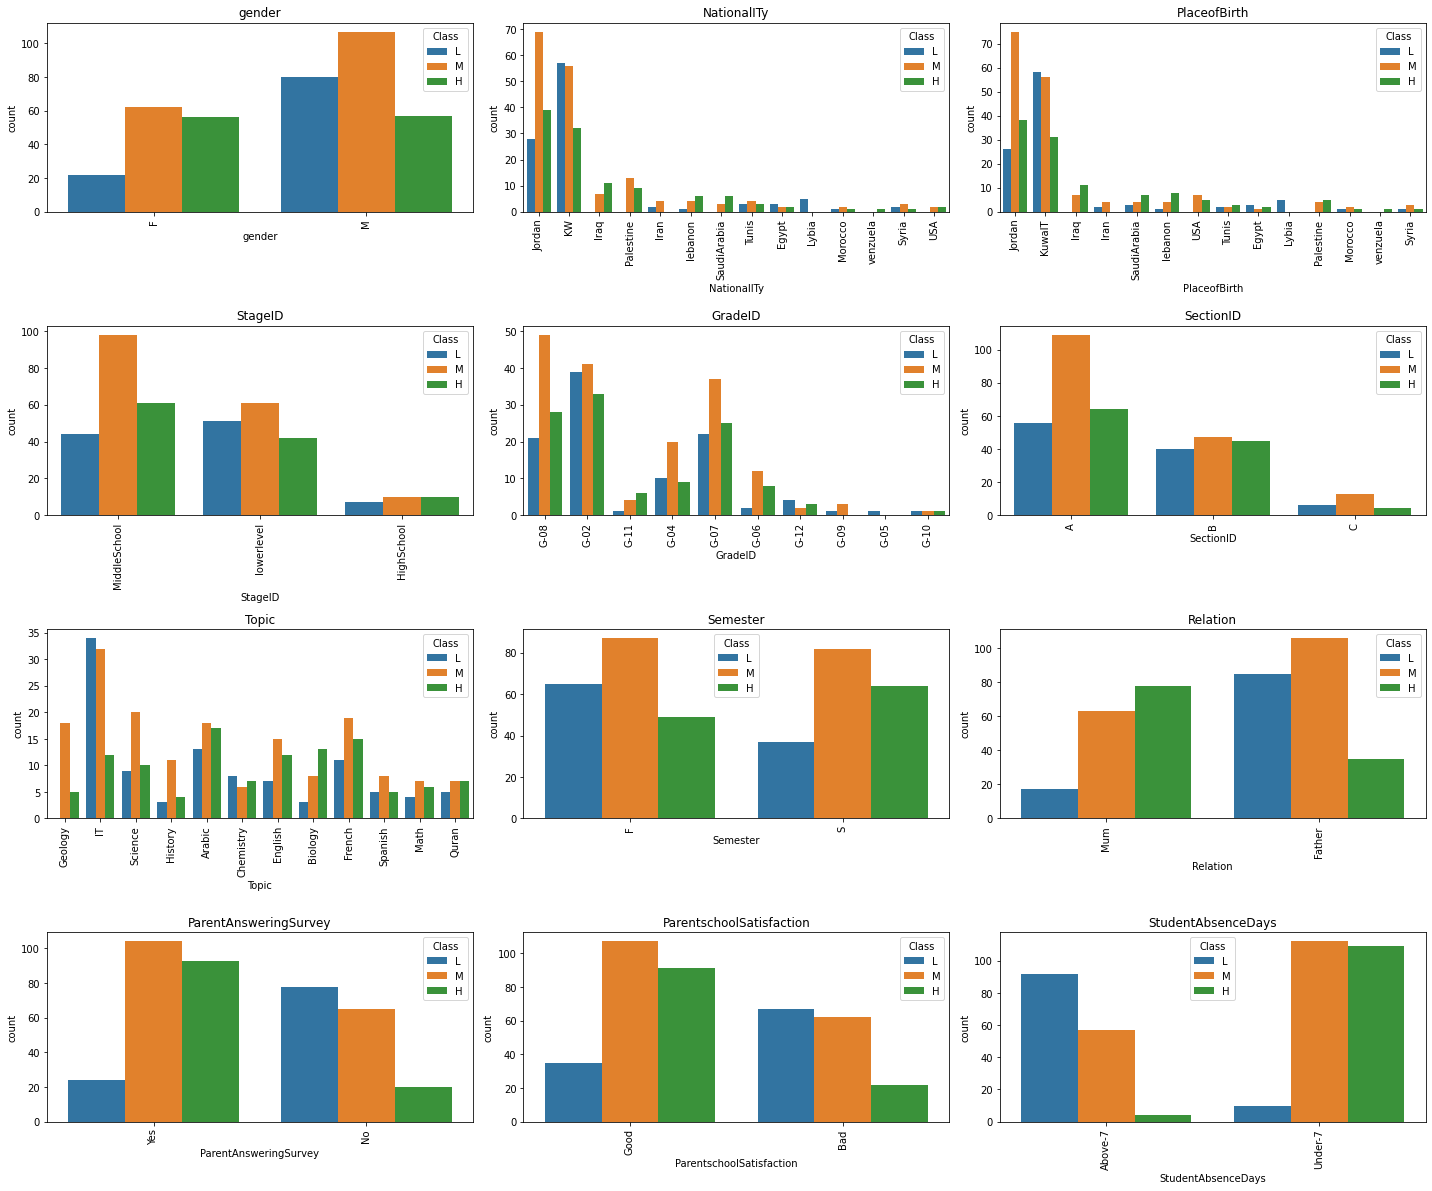

In [8]:
fig = plt.figure(figsize=(20,20))
for i,col in enumerate(cat_columns.iloc[:,:-1]):
    ax = fig.add_subplot(5, 3, i+1)
    sn.countplot(data=cat_columns,x=col, hue='Class',hue_order=['L','M','H'],ax=ax)
    plt.xticks(rotation=90)
    plt.title(col)
fig.tight_layout()
# sn.countplot(data=cat_columns,x='Class', hue='gender',order=['L','M','H'])

**Findings**
1. more females are between Medium and High perormer whereas boys are majorly medium and low
2. Specificly in IT the high performars are less as compared to low and medium
3. Student's who's Parents have less participation and satisfaction, not performed well as compared to others
4. Student's with absent under 7 are mostly good performer  

### c. Gender relational plots
It would be intersting to compare male and female students

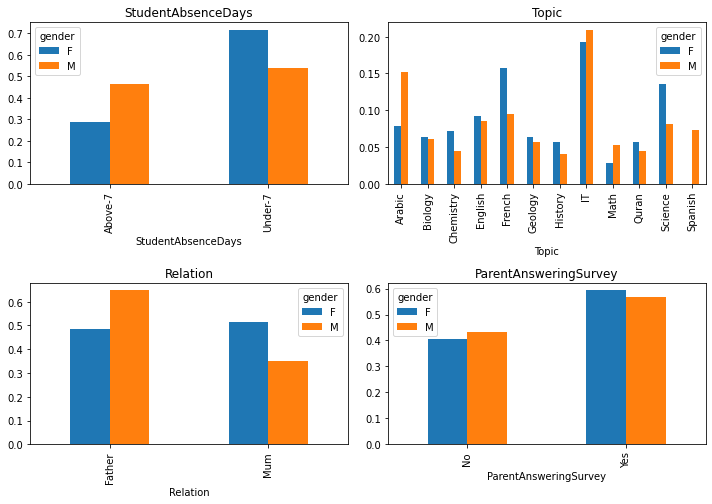

In [9]:
# here important thing is if we do the analsis without correct normalization we will get wrong interpretaion
# for example without normalization it will be seen more boys has chosen IT, but it is not true as male are 305 and girls are 176
# so normalizing on index will give correct insight that what percentage of girls or boys were interseted in IT, and that is almost same 
gender_analyze_cols = ['StudentAbsenceDays','Topic','Relation','ParentAnsweringSurvey']
fig = plt.figure(figsize=(20,20))
for i,col in enumerate(gender_analyze_cols):
    ax = fig.add_subplot(3,2, i+1)
    Class_on_handrs = pd.crosstab(cat_columns.gender, cat_columns[col],normalize = 'index')
    Class_on_handrs.T.plot.bar(figsize=(10,10),ax=ax)
    plt.xticks(rotation=90)
    plt.title(col)
fig.tight_layout()

**Findings**
1. females are less absent then the male studens
2. relations of females are more with mother
3. Both gender like subject IT, arebic and math is taken by more male where as female took science and french more after IT

### d. Contry and performance relationship
The another intersting plot would be to compare perfromace for each country

<AxesSubplot:xlabel='NationalITy'>

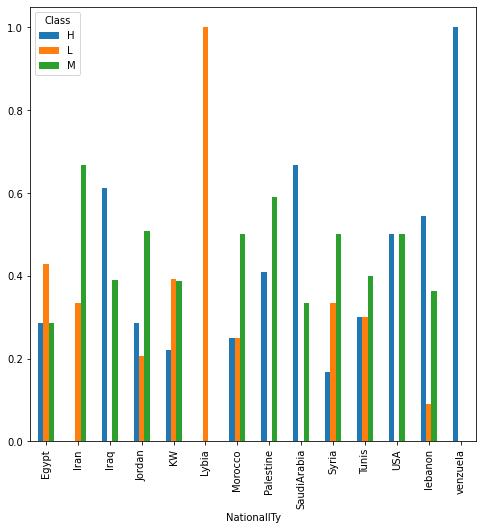

In [10]:
# relation between country and performance
# relation between male female, country and performance
Class_on_handrs = pd.crosstab(cat_columns.Class, cat_columns.NationalITy,normalize = 'columns')
Class_on_handrs.T.plot.bar(figsize=(8,8))
# Class_on_handrs

**Findings**
1. USA only has medium or high performing students
2. middle east countries has generally low and average performing students

## 2. Numeric features Visualization

### a. Numeric distribution plots

array([[<AxesSubplot:title={'center':'raisedhands'}>,
        <AxesSubplot:title={'center':'VisITedResources'}>],
       [<AxesSubplot:title={'center':'AnnouncementsView'}>,
        <AxesSubplot:title={'center':'Discussion'}>]], dtype=object)

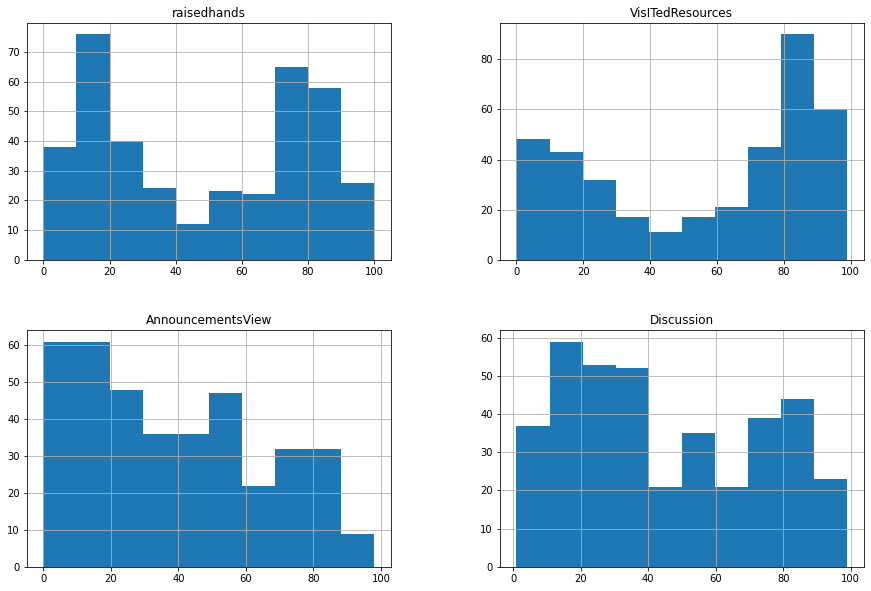

In [11]:
# check data distribution
num_columns.hist(figsize=(15,10))

**Findings**
1. As we have already seen in Pre-Processing kde graph plots, the distributions are close to normal

### b. coorelation between feature and Heat map

Text(0.5, 1.0, 'Heatmap')

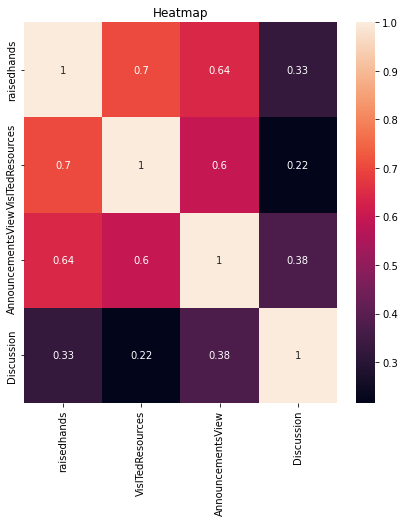

In [12]:
fig, ax = plt.subplots(figsize=(7,7)) 
sn.heatmap(num_columns.corr(), annot=True, ax = ax)
plt.title('Heatmap')

**Findings**
1. high correlation between raisedhands and visited resources, No high correlation between features to remove

### c. Scatter plot for numeric feature

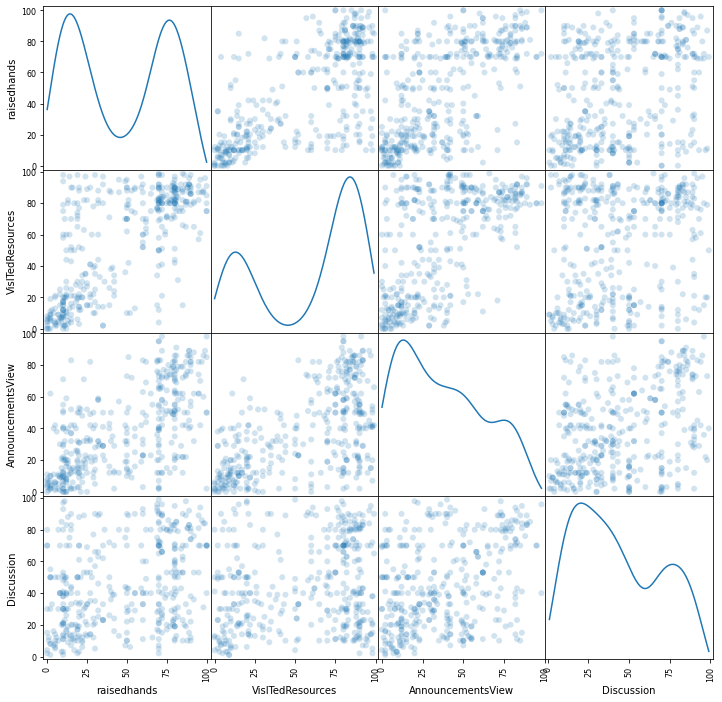

In [13]:
scatter_matrix(num_columns, 
               alpha=0.2, figsize=(12, 12), 
               diagonal='kde', marker='o');

**Findings**
1. It is the similar representation of correlation metric, a descent correlation between raised hands and visistedresources and not significant for others 

# 3. Categorical vs numeric analyis

### a. Relation of numeric features with respect to predicting class

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

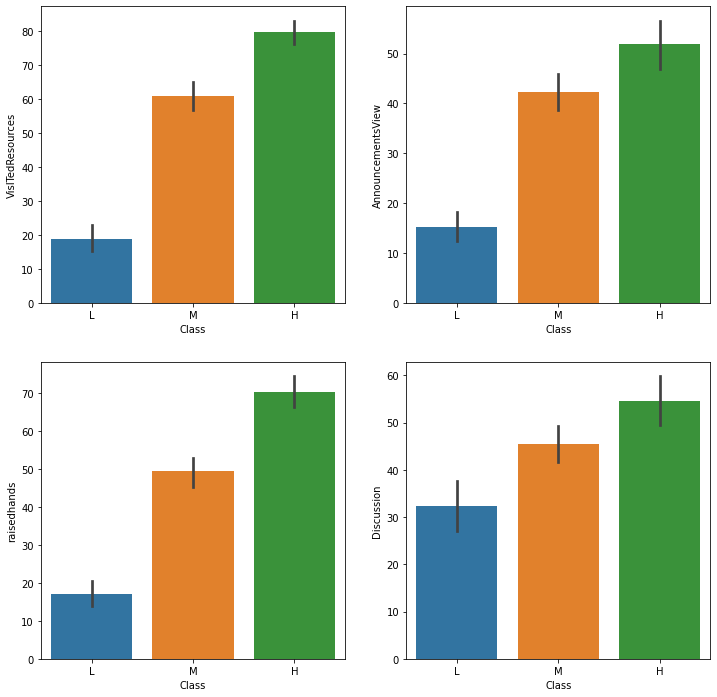

In [14]:
fig, ax  = plt.subplots(2,2,figsize=(12,12))
sn.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=ax[0,0])
sn.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=ax[0,1])
sn.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=ax[1,0])
sn.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=ax[1,1])

**Findings**
1. The more behavioural participation leads to better performance as observed from the above graphs
2. It was as expected, as higher contribution always helps to perform better

### b. Gender participation behavioral comparision  

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

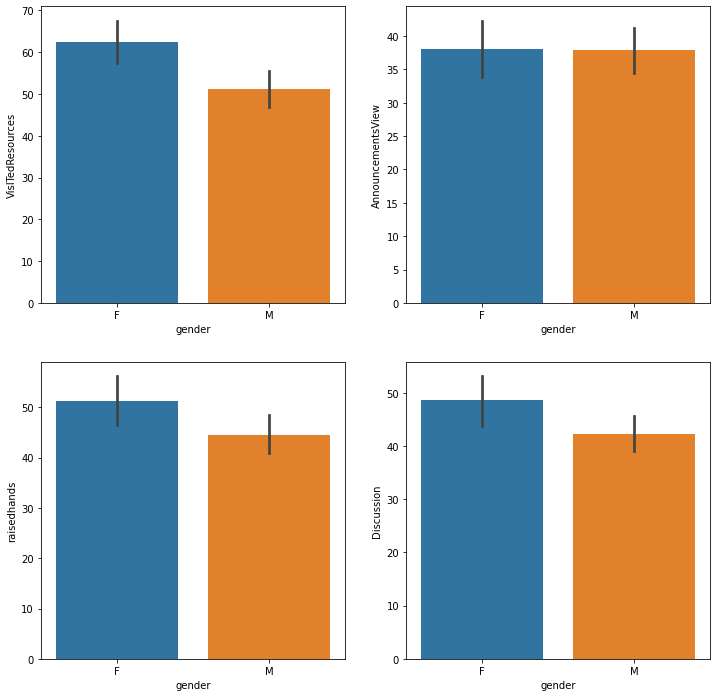

In [15]:
fig, ax  = plt.subplots(2,2,figsize=(12,12))
sn.barplot(x='gender', y='VisITedResources', data=data,  ax=ax[0,0])
sn.barplot(x='gender', y='AnnouncementsView', data=data,  ax=ax[0,1])
sn.barplot(x='gender', y='raisedhands', data=data,  ax=ax[1,0])
sn.barplot(x='gender', y='Discussion', data=data,  ax=ax[1,1])

**Findings** 
1. almost similar pattern is followed in all subplots, females have amost equal and more participation in class

### c. Box plots to compare the predicted variable variability

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

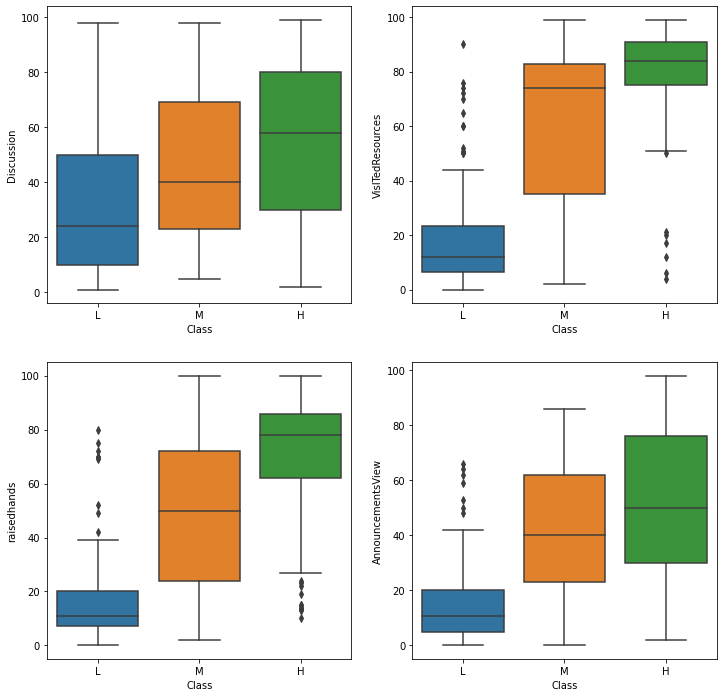

In [16]:
fig, ax  = plt.subplots(2, 2,figsize=(12,12))
sn.boxplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=ax[0,0])
sn.boxplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=ax[0,1])
sn.boxplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=ax[1,0])
sn.boxplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=ax[1,1])

**Findings**
1. visiting resources, annoucement views, and even raise hands, does not always gurantees a high performence
2. Taking part in discussion can leads the to better performance always

### d. Pair plot to analyse classes with feature correlation 

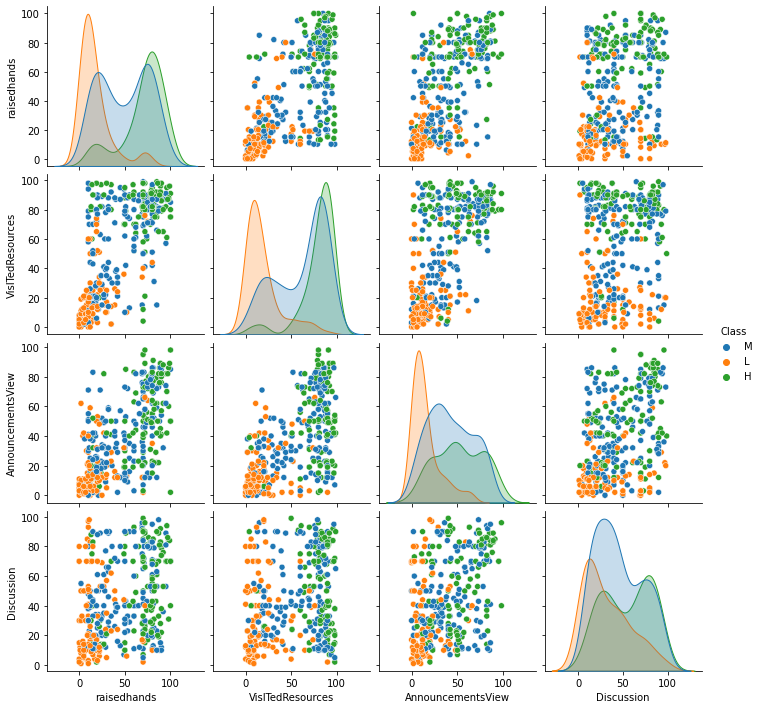

In [17]:
# pair plots
sn.pairplot(data,hue='Class')

**Findings**
1. showing the similar interpretation, more participation leads to better/high performance

## 4. Visualizing Training data with Dimentionality Reduction

### a. Support Vector Decomposition (SVD)

In [18]:
u, s, v = np.linalg.svd(num_columns, full_matrices=True)
u.shape,s.shape,v.shape

((384, 384), (4,), (4, 4))

Text(0, 0.5, 'varience covered')

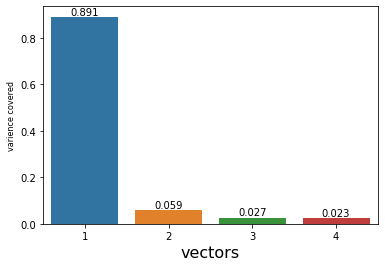

In [19]:
# varience covered by eigen vectors
var_exp= np.round(s**2/np.sum(s**2), decimals=3)
ax = sn.barplot(x=list(range(1,len(var_exp)+1)),y=var_exp)
ax.bar_label(ax.containers[0])
plt.xlabel('vectors', fontsize=16)
plt.ylabel('varience covered', fontsize=8)

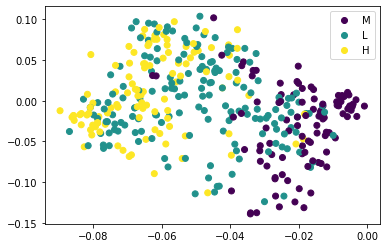

In [20]:
# plotting first two dimentions
plot = plt.scatter(u[:,0], u[:,1],c=data['Class'].replace('M',1).replace('L',0).replace('H',2))
plt.legend(handles=plot.legend_elements()[0], labels=list(data['Class']))
plt.show()

### b. Principle component analysis (PCA)

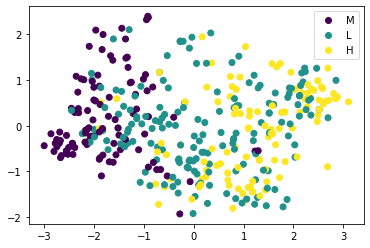

In [23]:
# PCA With scaling no kernal
pca = KernelPCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(num_columns)
plot = plt.scatter(Xt[:,0], Xt[:,1],c=data['Class'].replace('M',1).replace('L',0).replace('H',2))
plt.legend(handles=plot.legend_elements()[0], labels=list(data['Class']))
plt.show()

In [27]:
# # PCA, KernalPCA with polynomial kernal
# pca = KernelPCA(kernel='poly')
# Xt = pca.fit_transform(num_columns)
# plot = plt.scatter(Xt[:,0], Xt[:,1],c=data['Class'].replace('M',1).replace('L',0).replace('H',2))
# plt.legend(handles=plot.legend_elements()[0], labels=list(data['Class']))
# plt.show()

### b. Linear Discriminant Analysis (LDA

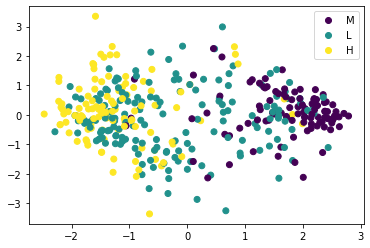

In [28]:
# LDA based on SVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
Xt = lda.fit_transform(num_columns, data.Class)
plot = plt.scatter(Xt[:,0], Xt[:,1],c=data['Class'].replace('M',1).replace('L',0).replace('H',2))
plt.legend(handles=plot.legend_elements()[0], labels=list(data['Class']))
plt.show()

**Comments**
From the above post visualizations, it is clear it is hard to distinguish data using numeric features only, also it does not add up any value to remove the features as their is a contribution from each feature in varience

## 5. Clustering and visualization

1. converting categoric data to numeric does not make much sense as there is no relationships between them  

In [29]:
# Determine optimal cluster number with elbow method
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(num_columns)                              
    wcss.append(model.inertia_)


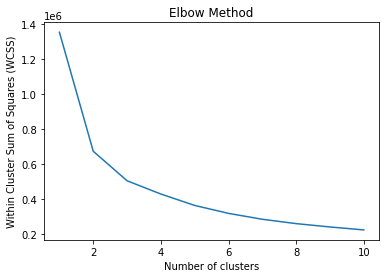

In [30]:
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

In [32]:
pred_y = kmeans.fit_predict(num_columns)

In [33]:
unique_label = np.unique(pred_y)
centers = kmeans.cluster_centers_
unique_label, centers

(array([0, 1, 2], dtype=int32),
 array([[57.57758621, 79.13793103, 39.55172414, 25.45689655],
        [18.53896104, 18.78571429, 17.98051948, 37.59090909],
        [74.57894737, 80.38596491, 63.24561404, 73.68421053]]))

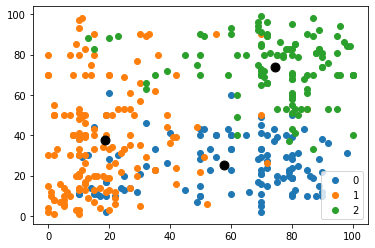

In [35]:
for i in unique_label:
    plt.scatter(num_columns[pred_y==i].iloc[:,0], num_columns[pred_y==i].iloc[:,3] , label = i)
plt.scatter(centers[:,0] , centers[:,3] , s = 80, color = 'k')
plt.legend()
plt.show()

**Findings** 
1. As we can see the data is not well clustered so hard to distinguish between them

# 6. Feature Selection

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [50]:
num_columns.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,70.0,69.0,46.0,45.0
1,12.0,30.0,0.0,17.0
2,49.0,70.0,19.0,75.0
3,72.0,87.0,72.0,89.0
4,70.0,92.0,50.0,7.0


In [51]:
cat_columns.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,Yes,Good,Above-7,M
1,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,No,Good,Above-7,L
2,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,Yes,Good,Under-7,H
3,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,Yes,Good,Above-7,M
4,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,Yes,Good,Under-7,H


In [64]:
# ANNOVA TEST for numeric input and categorical output
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(num_columns, cat_columns.iloc[:,-1])
fs.pvalues_

array([2.68061728e-45, 1.39053220e-57, 2.70745663e-28, 7.93252220e-09])

In [71]:
num_df = []
for i,j in zip(list(num_columns.columns),list(fs.pvalues_)):
    num_df.append([i,j])
df = pd.DataFrame(num_df,columns=['feature','p_value'])
df

,feature,p_value
0,raisedhands,2.680617e-45
1,VisITedResources,1.390532e-57
2,AnnouncementsView,2.707457e-28
3,Discussion,7.932522e-09


In [72]:
# chi TEST for categorical input and categorical output
fs = SelectKBest(score_func=chi2, k=2)
# apply feature selection
label_encoded_cols = cat_columns.iloc[:,:-1].apply(LabelEncoder().fit_transform)
X_selected = fs.fit_transform(label_encoded_cols, cat_columns.iloc[:,-1])
fs.pvalues_

array([3.66674099e-02, 3.26824613e-02, 1.44016423e-03, 5.84265429e-01,
       4.85896903e-02, 6.56364167e-01, 2.80098417e-03, 9.48147261e-02,
       1.01204580e-08, 6.79843819e-08, 6.71204829e-05, 1.15039638e-15])

In [74]:
num_df = []
for i,j in zip(list(cat_columns.columns)[:-1],list(fs.pvalues_)):
    num_df.append([i,j])
df = pd.DataFrame(num_df,columns=['feature','p_value'])
df.round(6)

,feature,p_value
0,gender,0.036667
1,NationalITy,0.032682
2,PlaceofBirth,0.001440
3,StageID,0.584265
4,GradeID,0.048590
5,SectionID,0.656364
6,Topic,0.002801
7,Semester,0.094815
8,Relation,0.000000
9,ParentAnsweringSurvey,0.000000
